In [1]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import keras

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3),activation = 'relu'))
classifier.add(Flatten())
classifier.add(Dense(units=10, activation='softmax'))
classifier.summary()

# Compiling the CNN
classifier.compile(optimizer = 'sgd',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                327690    
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train,-1)
#x_test = np.expand_dims(x_test,-1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print("x_est shape:", x_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
x_est shape: (10000, 32, 32, 3)


In [4]:
batch_size = 1024
epochs = 100
checkpoint = keras.callbacks.ModelCheckpoint('XModel{epoch:08d}.h5', period=1) 
history=classifier.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size=batch_size, epochs=epochs,callbacks=[checkpoint])
history

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 23s 463us/step - loss: 2.1910 - accuracy: 0.2227 - val_loss: 2.1005 - val_accuracy: 0.2887
Epoch 2/100
50000/50000 [==============================] - 21s 410us/step - loss: 2.0429 - accuracy: 0.2936 - val_loss: 1.9951 - val_accuracy: 0.3061
Epoch 3/100
50000/50000 [==============================] - 24s 470us/step - loss: 1.9671 - accuracy: 0.3133 - val_loss: 1.9618 - val_accuracy: 0.3149
Epoch 4/100
50000/50000 [==============================] - 21s 412us/step - loss: 1.9241 - accuracy: 0.3293 - val_loss: 1.9180 - val_accuracy: 0.3336
Epoch 5/100
50000/50000 [==============================] - 21s 418us/step - loss: 1.8909 - accuracy: 0.3410 - val_loss: 1.9369 - val_accuracy: 0.3115
Epoch 6/100
50000/50000 [==============================] - 20s 409us/step - loss: 1.8660 - accuracy: 0.3520 - val_loss: 1.8591 - val_accuracy: 0.3505
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 21s 417us/step - loss: 1.4786 - accuracy: 0.4908 - val_loss: 1.4979 - val_accuracy: 0.4757
Epoch 56/100
50000/50000 [==============================] - 22s 442us/step - loss: 1.4721 - accuracy: 0.4903 - val_loss: 1.4888 - val_accuracy: 0.4844
Epoch 57/100
50000/50000 [==============================] - 20s 405us/step - loss: 1.4652 - accuracy: 0.4940 - val_loss: 1.4805 - val_accuracy: 0.4913
Epoch 58/100
50000/50000 [==============================] - 21s 415us/step - loss: 1.4625 - accuracy: 0.4944 - val_loss: 1.4797 - val_accuracy: 0.4849
Epoch 59/100
50000/50000 [==============================] - 23s 464us/step - loss: 1.4554 - accuracy: 0.4970 - val_loss: 1.4737 - val_accuracy: 0.4855
Epoch 60/100
50000/50000 [==============================] - 22s 434us/step - loss: 1.4510 - accuracy: 0.4989 - val_loss: 1.4743 - val_accuracy: 0.4840
Epoch 61/100
50000/50000 [==============================] - 23s 451us/step - loss: 1.4491 - ac

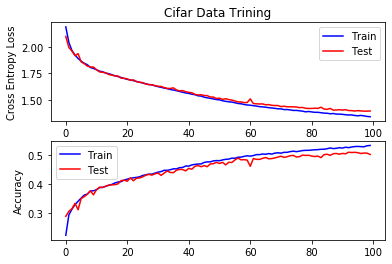

In [5]:
#Plot the training and valiation loss
'''The output of model.fit is a model.History object which is a record of metrics at each epoch. This can be used to graph the training and validation accuracy
to see where they plateaued off and if overfitting can subsequently be avoided'''
from matplotlib import pyplot
import sys
# plot loss
pyplot.subplot(211)
pyplot.ylabel('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue',label="Train")
pyplot.plot(history.history['val_loss'], color='red', label='Test')
pyplot.title("Cifar Data Trining")
pyplot.legend()
# plot accuracy
pyplot.subplot(212)
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='Train')
pyplot.plot(history.history['val_accuracy'], color='red', label='Test')
pyplot.legend()

In [6]:
##Entropy
def entropy(Y):
    """
    Also known as Shanon Entropy
    Reference: https://en.wikipedia.org/wiki/Entropy_(information_theory)
    """
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en


#Joint Entropy
def jEntropy(Y,X):
    """
    H(Y;X)
    Reference: https://en.wikipedia.org/wiki/Joint_entropy
    """
    YX = np.concatenate((Y,X), axis=0)
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    """
    conditional entropy = Joint Entropy - Entropy of X
    H(Y|X) = H(Y;X) - H(X)
    Reference: https://en.wikipedia.org/wiki/Conditional_entropy
    """
    return jEntropy(Y, X) - entropy(X)


#Information Gain
def gain(Y, X):
    """
    Information Gain, I(Y;X) = H(Y) - H(Y|X)
    Reference: https://en.wikipedia.org/wiki/Information_gain_in_decision_trees#Formal_definition
    """
    return entropy(Y) - cEntropy(Y,X)


In [ ]:
# Histogram of randomly selected two images Figure 5.13 and  Figure 5.14
a=x_train[150]
b=x_train[240]
unique, count = np.unique(a.flatten(), return_counts=True, axis=0)
x,y= np.unique(b.flatten(), return_counts=True, axis=0)
#prob = count/len(a.flatten())
plt.figure()
plt.bar(unique,count,width=0.01)
plt.xlabel("Pixel Indices")
plt.ylabel("Count")
plt.title(f"Histogram of Image 1")
plt.figure()
plt.bar(x,y,width=0.01)
plt.xlabel("Pixel Indices")
plt.ylabel("Count")
plt.title(f"Histogram of Image 2")
plt.show()

# Printing calculated information quantities Table 5.6
print("Entropy of Image 1, H(X): ",entropy(a.flatten()))
print("Entropy of Image 2, H(Y): ",entropy(b.flatten()))
print("Mutual Information of Images, I(X;Y): ",gain(a.flatten(),b.flatten()))
print("Conditional Entropy of Images, H(X|Y) : ",cEntropy(a.flatten(),b.flatten()))
print("Conditional Entropy of Images, H(Y|X) : ",cEntropy(b.flatten(),a.flatten()))
print("Joint Entropy of Images, H(X,Y): ",jEntropy(a.flatten(),b.flatten()))

In [7]:
from keras.models import load_model
## Loading the saved weights of 5th epoch to the new model
Model1=load_model("XModel00000001.h5")
Model10=load_model("XModel00000010.h5")
Model20=load_model("XModel00000020.h5")
Model30=load_model("XModel00000030.h5")
Model40=load_model("XModel00000040.h5")
Model50=load_model("XModel00000050.h5")
Model60=load_model("XModel00000060.h5")
Model70=load_model("XModel00000070.h5")
Model80=load_model("XModel00000080.h5")
Model90=load_model("XModel00000090.h5")
Model100=load_model("XModel00000100.h5")

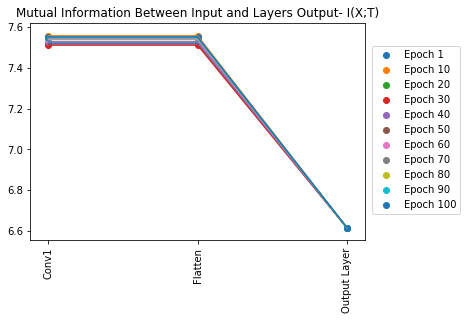

In [9]:
# Figure 6.1-b (Mutual Information between input and output of layers for Cifar-10 images)
images=x_train[0:10]
Model_list=[Model1,Model10,Model20,Model30,Model40,Model50,Model60,Model70,Model80,Model90,Model100]
outputs=[]
for i,model in enumerate(Model_list):
    layer_outputs=[layer.output for layer in model.layers[:]]
    activation_model=models.Model(inputs=model.input,outputs=layer_outputs)
    outputs.append(activation_model.predict(images))

entropi=[]

for i,model in enumerate(outputs):# i:0-10
    layerentropi=[]
    for j in range(len(outputs[0])): #j:0-8
        layerentropi.append(entropy(outputs[i][j].flatten()))
    entropi.append(layerentropi)

## Mutual Inforamtion Between Input and Output of Layers
minformation=[]
for i,model in enumerate(outputs):
    layermi=[]
    for j in range(len(outputs[0])):
        layermi.append(gain(images.flatten(),outputs[i][j].flatten()))
    minformation.append(layermi)

    
xlist=[1,2,3,]

plt.plot(xlist,minformation[0], )
plt.plot(xlist,minformation[1], )
plt.plot(xlist,minformation[2], )
plt.plot(xlist,minformation[3], )
plt.plot(xlist,minformation[4], )
plt.plot(xlist,minformation[5], )
plt.plot(xlist,minformation[6], )
plt.plot(xlist,minformation[7], )
plt.plot(xlist,minformation[8], )
plt.plot(xlist,minformation[9], )
plt.plot(xlist,minformation[10], )

plt.scatter(xlist,minformation[0], label="Epoch 1")
plt.scatter(xlist,minformation[1], label="Epoch 10")
plt.scatter(xlist,minformation[2], label="Epoch 20")
plt.scatter(xlist,minformation[3], label="Epoch 30")
plt.scatter(xlist,minformation[4], label="Epoch 40")
plt.scatter(xlist,minformation[5], label="Epoch 50" )
plt.scatter(xlist,minformation[6], label="Epoch 60")
plt.scatter(xlist,minformation[7], label="Epoch 70")
plt.scatter(xlist,minformation[8], label="Epoch 80")
plt.scatter(xlist,minformation[9], label="Epoch 90")
plt.scatter(xlist,minformation[10], label="Epoch 100")
plt.title("Mutual Information Between Input and Layers Output- I(X;T)")
ax = plt.gca()
ax.set_xticks([1,2,3])
ax.set_xticklabels(["Conv1","Flatten","Output Layer"],rotation = 90)
plt.legend(loc=4,bbox_to_anchor=(1.3, 0.1))
plt.show()    

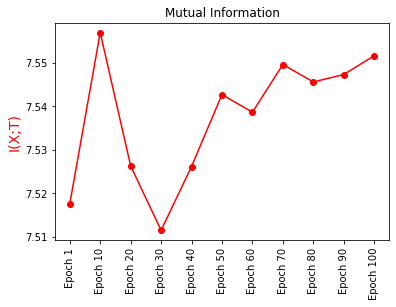

In [12]:
#Mutual Information Between Input and Output , Output and Label (Figure 6.3) during training
I_YT=[]
I_XT=[]
for i in range(len(outputs)):
    I_YT.append(gain(outputs[i][0].flatten(),y_train[0:10].flatten()))
    I_XT.append(gain(outputs[i][0].flatten(),images.flatten()))
    
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(range(len(Model_list)), I_XT, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("Training Epochs",fontsize=14)
# set y-axis label
ax.set_ylabel("I(X;T)",color="red",fontsize=14)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['Epoch 1','Epoch 10','Epoch 20',"Epoch 30","Epoch 40","Epoch 50",
                    "Epoch 60","Epoch 70","Epoch 80","Epoch 90","Epoch 100"],rotation = 90)


plt.title("Mutual Information")
plt.show()